# Google Data Analytics Case Study - Cyclistic Bike Share.

by **Ajali Augustine Esosa**

*ajaliesosa442@gmail.com*



**About Cyclistic**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

**Objectives**

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders dier, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

**Questions to Anaswer:**

Three questions will guide the future marketing program:

* How do annual members and casual riders use Cyclistic bikes dierently?

* Why would casual riders buy Cyclistic annual memberships?

* How can Cyclistic use digital media to influence casual riders to become members?

**Manager's Task**

Moreno has assigned the first question to me to provide answer: How do annual members and casual riders use Cyclistic bikes dierently?

# ABOUT THE DATA

I will use Cyclistic’s historical trip data to analyze and identify trends. The data for the 12 months of 2022 of the Cyclistic trip datasets was utilized. 
[here](https://divvy-tripdata.s3.amazonaws.com/index.html) for download (**Note:** The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the
datasets are appropriate and will enable me to answer the business questions. The data has been made available by Motivate
International Inc. under this [license](https://www.divvybikes.com/data-license-agreement).)

The 2022 cyclistic biketrip datasets, has more than 5.6 million rows and 13 columns. it has a size of more than 560 mb. 


In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy scikit-learn


In [2]:
# importing  data analysis libraries 
import numpy as np           # For numerical operations
import pandas as pd          # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns        # For advanced data visualization
import scipy.stats as stats  # For statistical functions
import sklearn               # For machine learning and data preprocessing
import statsmodels.api as sm # For statistical modeling
import plotly.express as px  # For interactive data visualization
import datetime              # For working with dates and times


# Data Collections phase 

In [3]:
# retriving files url 
file1 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202201-divvy-tripdata.csv"
file2 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202202-divvy-tripdata.csv"
file3 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202203-divvy-tripdata.csv"
file4 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202204-divvy-tripdata.csv"
file5 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202205-divvy-tripdata.csv"
file6 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202206-divvy-tripdata.csv"
file7 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202207-divvy-tripdata.csv"
file8 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202208-divvy-tripdata.csv"
file9 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202209-divvy-publictripdata.csv"
file10 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202210-divvy-tripdata.csv"
file11 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202211-divvy-tripdata.csv"
file12 = r"C:\Users\ACER\Desktop\my_project datatasets\2022_csv\202212-divvy-tripdata.csv"

# load data 
we load the csv files into panda dataframes

In [4]:
# load csv files into dataframe
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)
df6 = pd.read_csv(file6)
df7 = pd.read_csv(file7)
df8 = pd.read_csv(file8)
df9 = pd.read_csv(file9)
df10 = pd.read_csv(file10)
df11 = pd.read_csv(file11)
df12 = pd.read_csv(file12)

# Column name consistency
now that we have loaded our data, our next step is to ensure that our dataframes have the same column names 

In [5]:
# create a list of all the dataframe 
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
# we set a reference column 
ref_column = set(dfs[0].columns)

# initailize a variable to track consistency 
consistent = True 

# we loop through the list to searcg for inconsistency
for  df in dfs[1:]:
    if set(df.columns) != ref_column:
        consistent = False
        break
        
if consistent:
    print('dataframes have consistents columns names')
    
else:
    print('dataframs does not have consistent columns names')
    

dataframes have consistents columns names


Now that we are certain that our column names are consistent, we will now proceed to combining the dataframe into one 

In [6]:
# now we will merge the datasets and store it as df 
df = pd.concat(dfs, axis=0, ignore_index=True)
# now we display the first 10 rows 
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [8]:
df.shape

(5667717, 13)

In [9]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.667717e+06,5.667717e+06,5.661859e+06,5.661859e+06
mean,4.190222e+01,-8.764783e+01,4.190242e+01,-8.764790e+01
std,4.626109e-02,2.999925e-02,6.805821e-02,1.082985e-01
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,4.193000e+01,-8.762957e+01,4.193000e+01,-8.762963e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00


In [10]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

# Data Cleaning phase 
we would clean our data and prepare it for analysis. 
we would follow the steps below to clean our data
* handle missing values 
* remove duplicates 
* change data types
* add and drop columns  
* handle outliers 
 we start 

# Handling missing values 
we check for missing values and then well handle them

In [11]:
missing_val = df.isnull().sum()
print(missing_val)

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64


from the above result, the columns with the data needed for our analysis does not have any missing values 

# handling duplicates 
we would handle dupliactes by first checking if we have dupliacted values in our datasets and then removing it.

In [12]:
# checking for duplicates
duplicates = df[df.duplicated()]
if df.duplicated().any():
    print('df contains duplicated values')
else:
    print('df does not contain duplicated values')

df does not contain duplicated values


now we are sure our datasets does not contain any duplicates 

# addressing data types 
we would change the data type for start time and end time to datatime types 


In [13]:
column_to_convert = ['started_at','ended_at']
for column in column_to_convert:
    df[column] =pd.to_datetime(df[column])

print(df.dtypes)

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object


now that we have successfully done that, we would now extract the ride durations in hours th columns 

In [14]:
df['ride_length'] = ((df['ended_at'] - df['started_at']).dt.total_seconds()/60).round(2).astype(float)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,6.03


we would alse extract two columns from the started time 
* day of the month column 
* day of the week column
* hour_of_day column

In [15]:
# we extract day of month column as type int
df['day_of_month'] = df['started_at'].dt.day.astype(int)

# we extract day_of_week column
# we add 1 to start it from sunday

df['day_of_week'] = df['started_at'].dt.strftime('%A')
# extracting hours of the day column
df['hour_of_day'] = df['started_at'].dt.hour


We have successfully added the column, now we would drop some columns

In [16]:
# create a list of columns to be dropped
df.drop(columns= ['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_month,day_of_week,hour_of_day
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,2.95,13,Thursday,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,4.35,10,Monday,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,4.35,25,Tuesday,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,14.93,4,Tuesday,0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,6.03,20,Thursday,1


# renaming some column
we will rename some column for effectiveness in passing our message and for easy readability. this will help us to know the kind of data in thoes columns 
so we will be renaming the following:
* rideable_type to ride_type
* started_at to start_time
* ended_at to end_time 
* member_casual = user_type

In [17]:
df.rename(columns = {'rideable_type': 'ride_type',
                     'started_at': 'start_time',
                     'ended_at': 'end_time',
                     'member_casual' : 'user_type'
    
}, inplace=True)

df.head(2)

,ride_id,ride_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,user_type,ride_length,day_of_month,day_of_week,hour_of_day
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,2.95,13,Thursday,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,4.35,10,Monday,8


Column name have been changed successfully
now we will check the categories for the ride_type columns and the user_type column 

In [18]:
unique_ride_type = df['ride_type'].unique()
print('the ride types are:', unique_ride_type)

user_type_cate = df['user_type'].unique()
print('the user types are:', user_type_cate)

the ride types are: ['electric_bike' 'classic_bike' 'docked_bike']
the user types are: ['casual' 'member']


now we are sure of the number and list of ride types and user type present in the datasets 

we will now proceed to check for negative values and zero values for ride_length.
* ride length is the duration of of the ride 
* it cannot have negative values 
* should also not have zero values 

so will check if there are zero and negative values, if yes, then we will drop it 

In [19]:
negative_values = (df['ride_length']<= 0).any()
print(negative_values)

True


true implies the column contains negative and zero values, we will now proceed to drop it 


In [20]:
df = df.loc[df['ride_length']>0]
df.head()

,ride_id,ride_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,user_type,ride_length,day_of_month,day_of_week,hour_of_day
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,2.95,13,Thursday,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,4.35,10,Monday,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,4.35,25,Tuesday,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,14.93,4,Tuesday,0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,6.03,20,Thursday,1


# handling outliers 
* we will check for outliers using a boxplot of ride length column 

Text(0.5, 0, 'Ride duration in minutes')

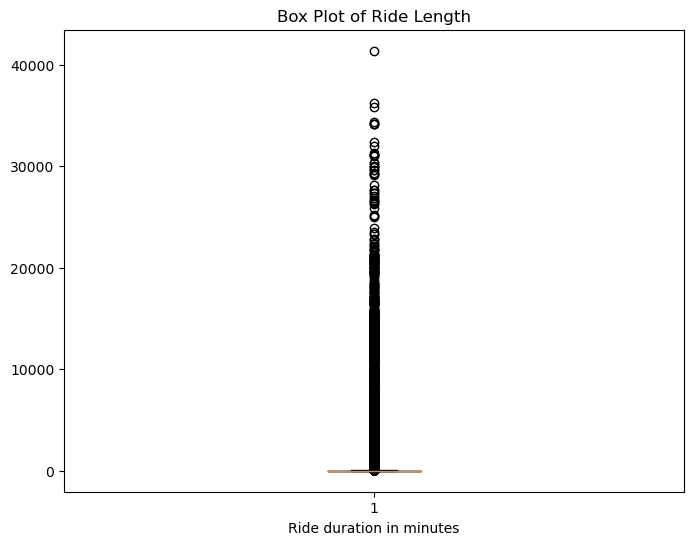

In [21]:
# do a box plot 
ride_length = df['ride_length']
# set fig size
plt.figure(figsize=(8, 6))

plt.boxplot(ride_length, vert=True)
plt.title('Box Plot of Ride Length')
plt.xlabel('Ride duration in minutes')

there are outliers now lets handle it using:
the lower and upper bound method (robbust statistics)

In [22]:
# obtain the needed quartile ranges 
Q1 = df['ride_length'].quantile(0.25)
Q3 = df['ride_length'].quantile(0.75)
# find the values of the IQR
IQR = Q3 - Q1
# calculate the two boundaries 
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# exclude extreme values from datasets 
df = df[(df['ride_length'] >= lower_bound) & (df['ride_length'] <= upper_bound)]

now we will plot a box plot to see if the outliers have been handled

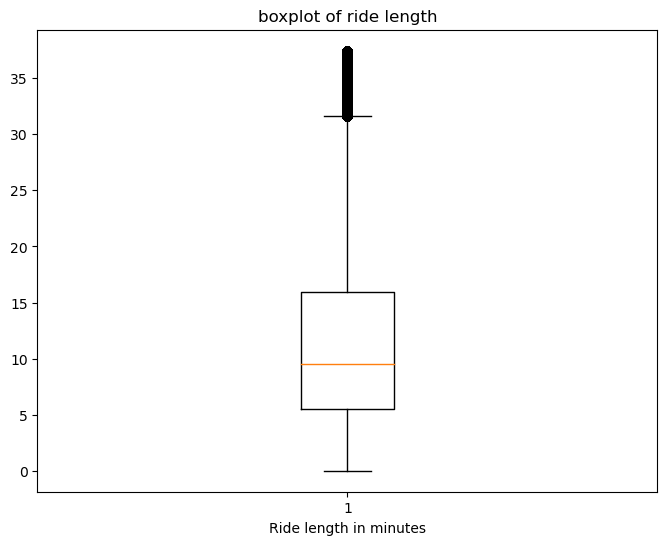

In [23]:
ride_length1 = df['ride_length']
plt.figure(figsize=(8, 6))
plt.boxplot(ride_length1, vert=True)
plt.title('boxplot of ride length')
plt.xlabel('Ride length in minutes')
plt.show()

In [24]:
df.describe()

,ride_length,day_of_month,hour_of_day
count,5.250139e+06,5.250139e+06,5.250139e+06
mean,1.169192e+01,1.575846e+01,1.421266e+01
std,8.157113e+00,8.811929e+00,5.071038e+00
min,2.000000e-02,1.000000e+00,0.000000e+00
25%,5.530000e+00,8.000000e+00,1.100000e+01
50%,9.520000e+00,1.600000e+01,1.500000e+01
75%,1.595000e+01,2.300000e+01,1.800000e+01
max,3.743000e+01,3.100000e+01,2.300000e+01


In [25]:
df.shape

(5250139, 13)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5250139 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   ride_type           object        
 2   start_time          datetime64[ns]
 3   end_time            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   user_type           object        
 9   ride_length         float64       
 10  day_of_month        int32         
 11  day_of_week         object        
 12  hour_of_day         int64         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(8)
memory usage: 540.7+ MB


# ANALYSING THE DATA 
* summary table 
* ride volume analysis
* ride length analysis 
* bike type anal

# summary table 
we will generate summary table for the following:
* ride_type 
* user_type

In [27]:
# Group the data by user type (member vs. casual) and calculate summary statistics
user_type_summary = df.groupby('user_type').agg({
    'ride_length': ['mean', 'median'],
    'day_of_week': lambda x: x.mode().iloc[0],
    'hour_of_day': lambda x: x.mode().iloc[0]
}).reset_index()

user_type_summary


user_type ride_length        day_of_week hour_of_day
                   mean median    <lambda>    <lambda>
0    casual   13.298541  11.25    Saturday          17
1    member   10.692037   8.53    Thursday          17

from the user type summary table above, we can infer the following
* saturday are the most popular ride days for casual users
* thurdays are the most popular ride days for member users 
* the most popular ride hours for both users is 5pm

In [28]:
# Group the data by user type (member vs. casual) and calculate summary statistics
ride_type_summary = df.groupby('ride_type').agg({
    'ride_length': ['mean', 'median'],
    'day_of_week': lambda x: x.mode().iloc[0],
    'hour_of_day': lambda x: x.mode().iloc[0]
}).reset_index()

ride_type_summary


ride_type ride_length        day_of_week hour_of_day
                        mean median    <lambda>    <lambda>
0   classic_bike   12.218882  10.00    Saturday          17
1    docked_bike   19.258748  18.98    Saturday          16
2  electric_bike   10.924951   8.88    Thursday          17

the ride type summary table tells use the following:
* classic and docked bikes have saturday as their most popular ride day of the week
* elctric bike users use it more on thurdays 

# Data Visualization phase 
To visualize the dataset, we can use various types of plots and charts to gain insights into 
* ride volume 
* ride length 
* ride type and 
* station/trip patterns.

# 1) Ride Volume Analysis
* Create a time series plot showing the number of rides over time (e.g., daily or monthly) to identify trends and patterns.
* Create a bar chart that shows the ride count for each day of the week to understand weekly variations.
* Generate a heatmap of ride counts by hour of the day and day of the week to visualize peak ride times.


<Figure size 1200x600 with 0 Axes>

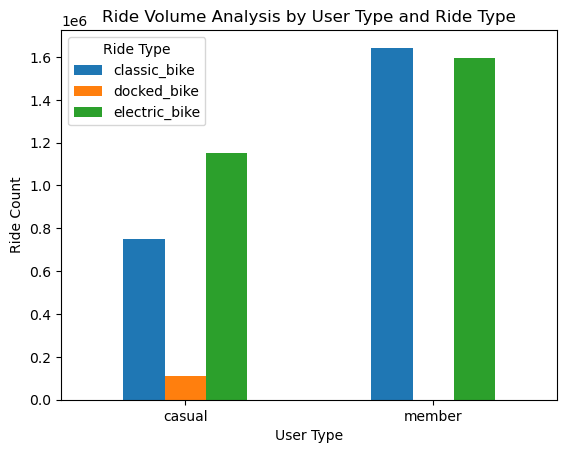

In [42]:
# Create a pivot table to aggregate ride counts by user type and ride type
pivot_table = df.pivot_table(index='user_type', columns='ride_type', values='ride_id', aggfunc='count')

# Create a combined bar plot
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=False)
plt.title('Ride Volume Analysis by User Type and Ride Type')
plt.xlabel('User Type')
plt.ylabel('Ride Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Ride Type')
plt.show()


# insight
* dockbikes are the  least utilized bikes by both casual and member users 
* member riders have more ride volumes for both classic bikes and electric bikes 

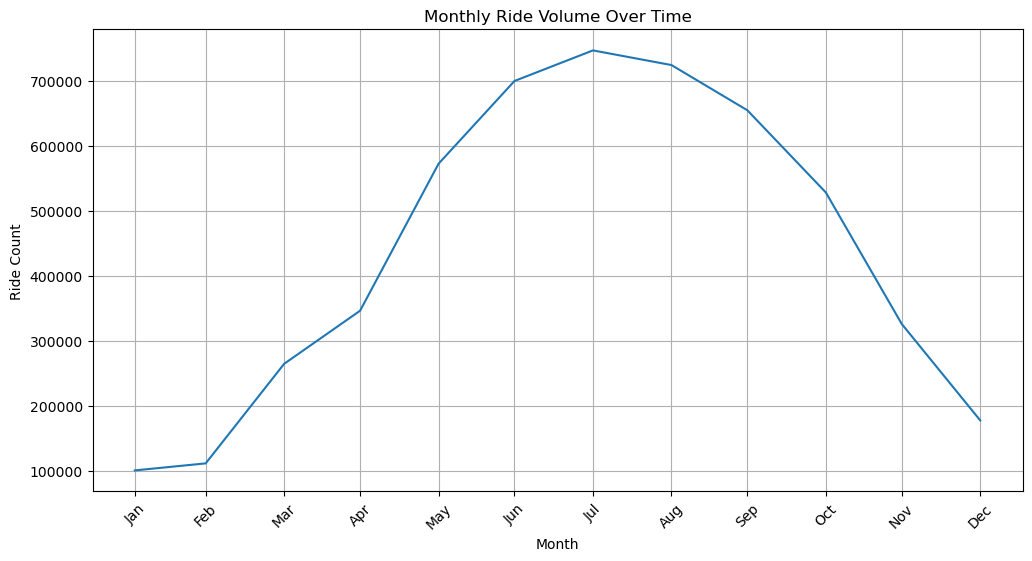

In [29]:
import calendar

# Resample the data by month and count rides
monthly_ride_count = df.resample('M', on='start_time').size()

# Extract month names
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # Abbreviated month names

# Create a time series plot with month names
plt.figure(figsize=(12, 6))
plt.plot(monthly_ride_count.index, monthly_ride_count.values)
plt.title('Monthly Ride Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.xticks(monthly_ride_count.index, month_names, rotation=45)  # Show month names and rotate them for readability
plt.grid(True)
plt.show()





# insights
The following insight can be drawn from the above chart
* january and february recorded the lowest ride volume 
* At the end of febraury there was a continuous increase in ride volume for another 5 months with june ending  recording the highest ride volume for the year 
* At the starting of july, ride volume decreases continuously till the month of December
* the month of April recorded the largest ride volume gradient.

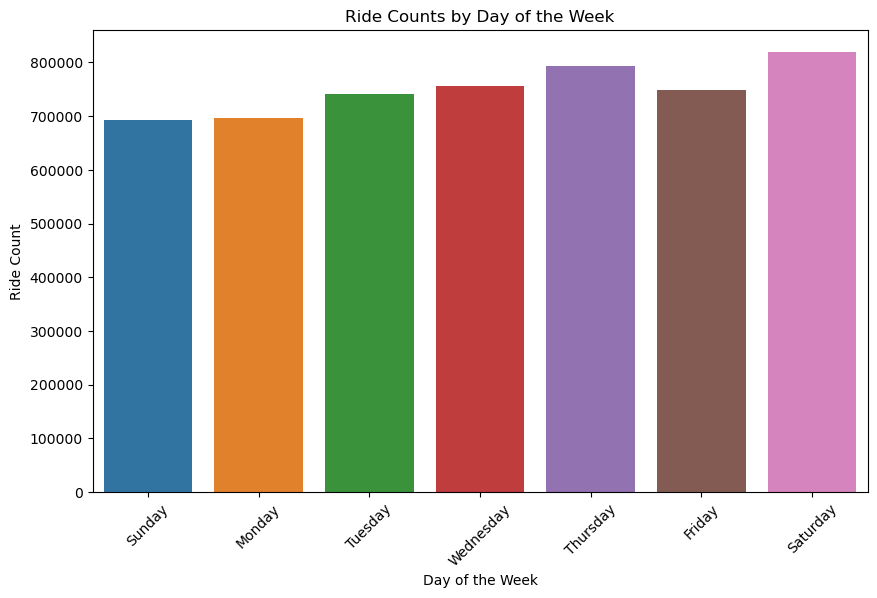

In [30]:
# Create a bar chart for ride counts by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Ride Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Ride Count')
plt.xticks(rotation=45)
plt.show()

# insights
* Sunday and Monday both recorded the lowest ride count 
* Wednesday, Thurdays and Saturday are top 3 days with the highest ride count 
* Saturday have the highest ride count followed by Thursday

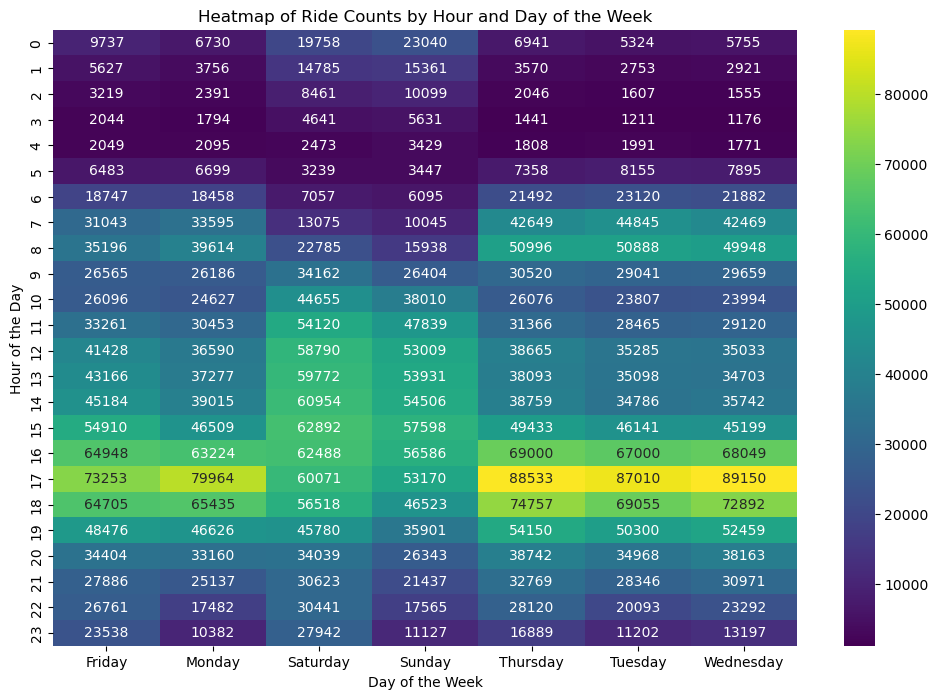

In [31]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='hour_of_day', columns='day_of_week', values='ride_id', aggfunc='count')

# Create a heatmap of ride counts by hour of the day and day of the week
plt.figure(figsize=(12, 8))
sns.heatmap(data=heatmap_data, cmap='viridis', fmt='g', annot=True, cbar=True)
plt.title('Heatmap of Ride Counts by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

# insights
* the lowest ride count for most days of the week occurs from 12:00am to 5:00am 
* the highest ride count for most days of the week occurs from 4:00pm to 7:00pm
* Tuesdays, Wednesdays, Thursdays have their highest ride count at 5:00pm 

# 2) Ride Length Analysis:

* Create a histogram of ride lengths to visualize the distribution of ride durations.
* create a combined bar graph to visualize user_type ride length by day of the week
* create a combined bar graph to visualize ride type ride length for day of the week
* Create a kernel density plot to visualize the probability density of ride lengths.

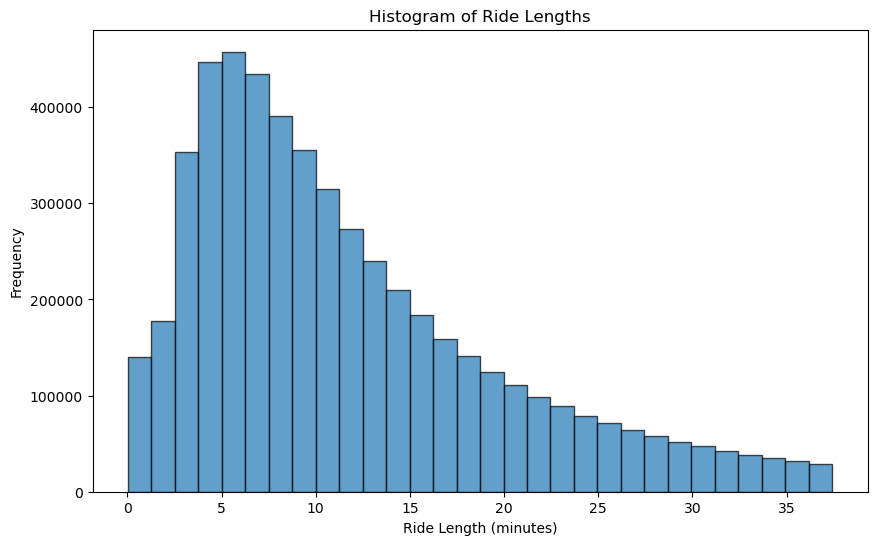

In [32]:
# Create a histogram of ride lengths
plt.figure(figsize=(10, 6))
plt.hist(df['ride_length'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Ride Lengths')
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Frequency')
plt.show()


# insights
* over 40,000 users ride for a duration 4 to 6 minutes.
* As the ride duration increases the number of rides decreases.
* Only few members use cyclistic bikes for long distance 

C:\Users\ACER\AppData\Local\Temp\ipykernel_6868\647204695.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='day_of_week', y='ride_length', hue='user_type', ci=None)


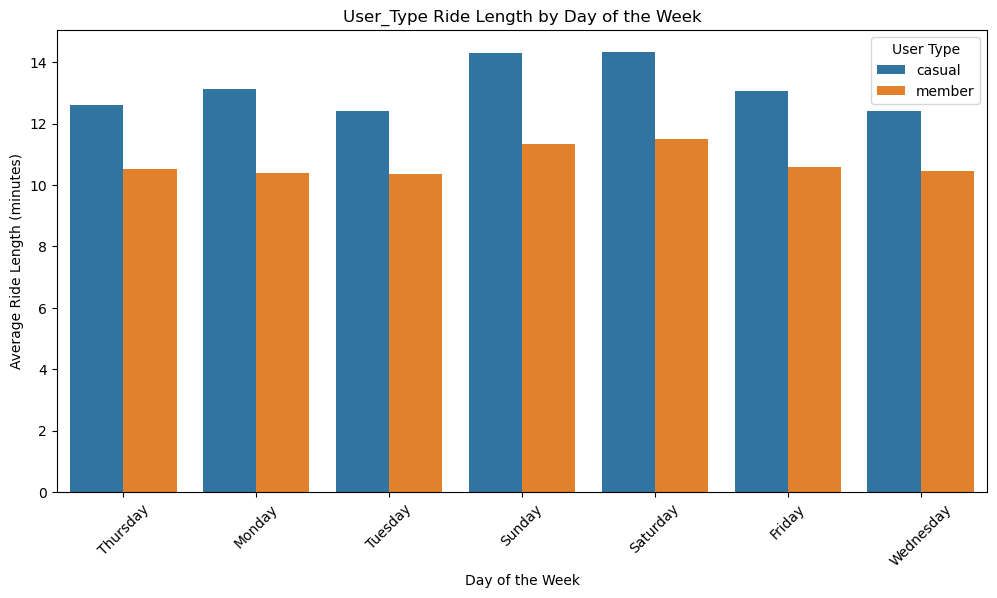

In [33]:
# Create a combined bar graph for user_type ride length by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='day_of_week', y='ride_length', hue='user_type', ci=None)
plt.title('User_Type Ride Length by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (minutes)')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.show()


# insights
* from the chart, it is very clear that for each day of the week, casual riders ride for longer time than member riders 

C:\Users\ACER\AppData\Local\Temp\ipykernel_6868\801252036.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='day_of_week', y='ride_length', hue='ride_type', ci=None)


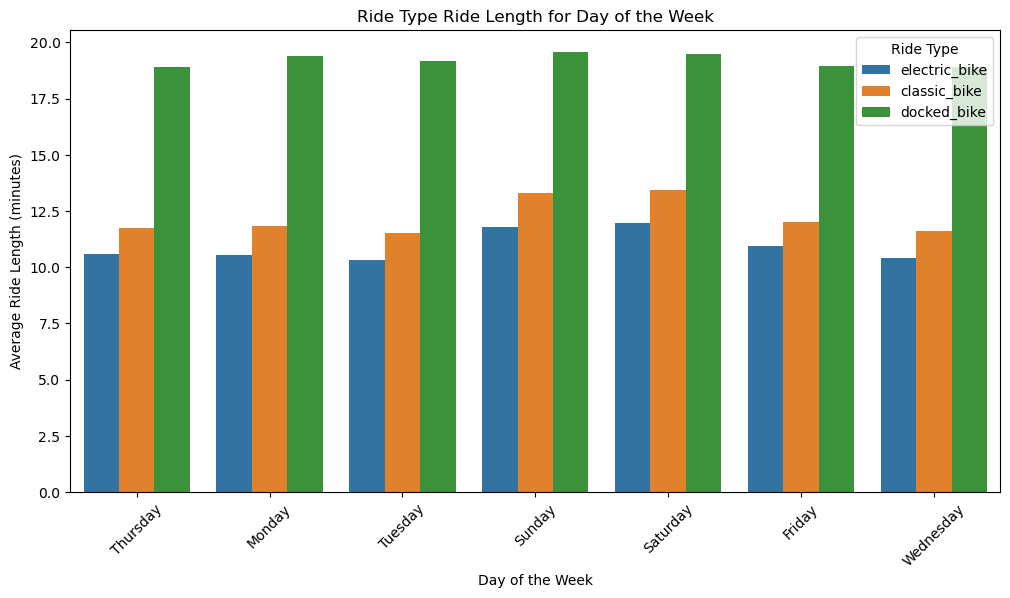

In [34]:
# Create a combined bar graph for ride type ride length for day of the week
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='day_of_week', y='ride_length', hue='ride_type', ci=None)
plt.title('Ride Type Ride Length for Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Ride Type')
plt.show()


# insight
Electric bikes riders ride for shorter ride duration, followed by classic bike users and finally Dock bikes riders ride for longer ride length for each day of the week.

C:\Users\ACER\AppData\Local\Temp\ipykernel_6868\452130404.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ride_length'], shade=True)


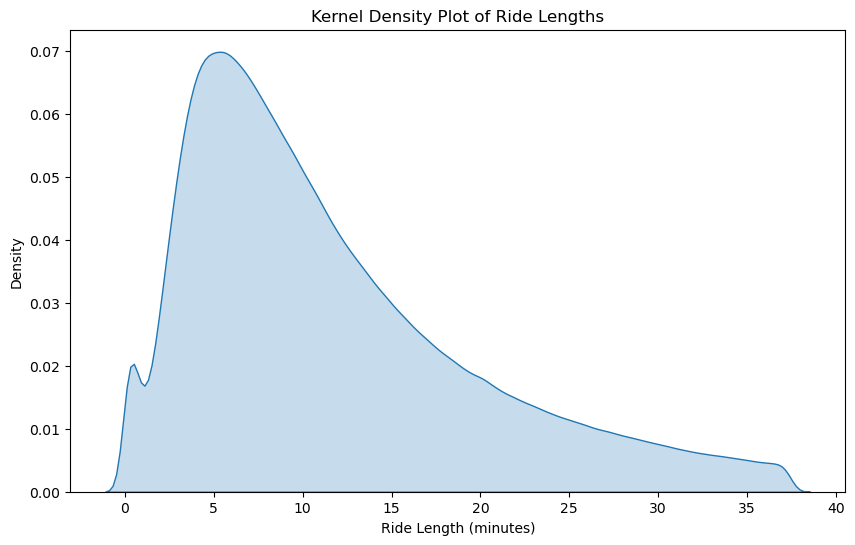

In [35]:
# Create a kernel density plot for ride lengths
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ride_length'], shade=True)
plt.title('Kernel Density Plot of Ride Lengths')
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Density')
plt.show()


# insight 
this chart confirms our previous insight drawn from the histogram plot, 
most of the riders ride for an average of 5 to 7 minutes 

# 3) Ride Type Analysis:

* Create a pie chart to show the distribution of ride types (e.g., electric bikes, classic bikes) to understand the popularity of each type.
* Use a bar chart to compare the average ride length for different ride types.
* Create a stacked bar chart to show the ride type distribution over time (e.g., monthly).

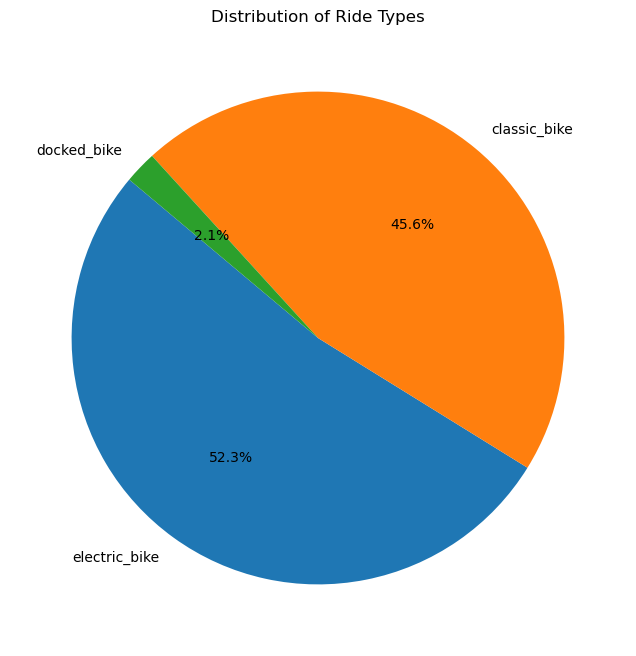

In [36]:
# Group the data by ride type and calculate the ride counts
ride_type_counts = df['ride_type'].value_counts()

# Create a pie chart to show the distribution of ride types
plt.figure(figsize=(8, 8))
plt.pie(ride_type_counts, labels=ride_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ride Types')
plt.show()


# insight 
* from the pie chart
* elctric bike are used most by users, with more than 53% of cyclistic bike users patronizing it. 
* dock bikes are used least by users, with only 2% users 
* and classic bikes having approximately 46% users 

C:\Users\ACER\AppData\Local\Temp\ipykernel_6868\3460124337.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='ride_type', y='ride_length', ci=None)


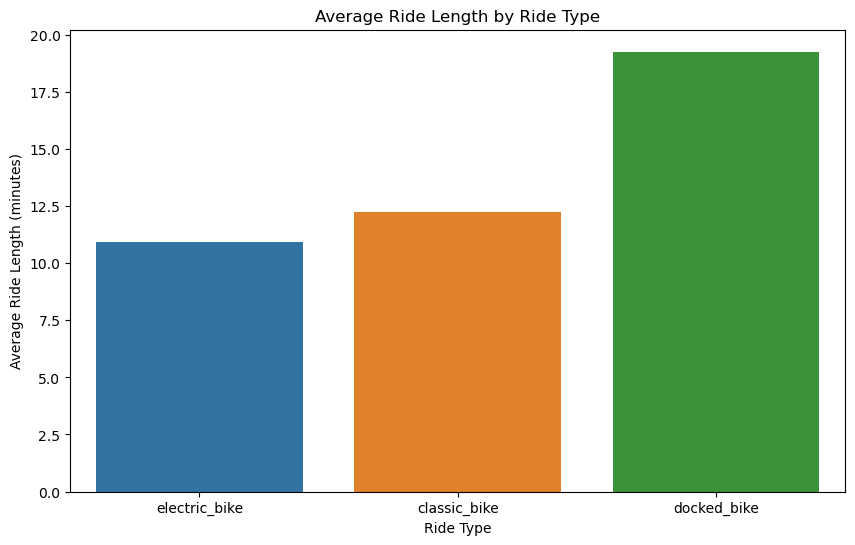

In [37]:
# Create a bar chart to compare the average ride length for different ride types
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='ride_type', y='ride_length', ci=None)
plt.title('Average Ride Length by Ride Type')
plt.xlabel('Ride Type')
plt.ylabel('Average Ride Length (minutes)')
plt.show()


<Figure size 1200x600 with 0 Axes>

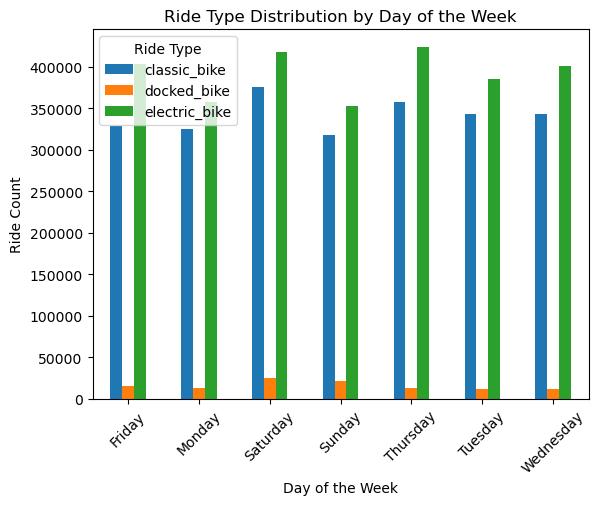

In [43]:
# Create a pivot table for the stacked bar chart
pivot_table = df.pivot_table(index='day_of_week', columns='ride_type', values='ride_id', aggfunc='count')

# Create a stacked bar chart to show the ride type distribution over time (day_of_week)
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=False)
plt.title('Ride Type Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Ride Count')
plt.xticks(rotation=45)
plt.legend(title='Ride Type')
plt.show()


# 4) Stations/Trip Analysis:

* Use a map to plot the starting and ending station locations to visualize the most common trip routes.
* Create a network graph to represent the connections between stations and analyze the flow of trips.
* Display the top starting and ending stations with the highest ride volume to identify popular station pairs.

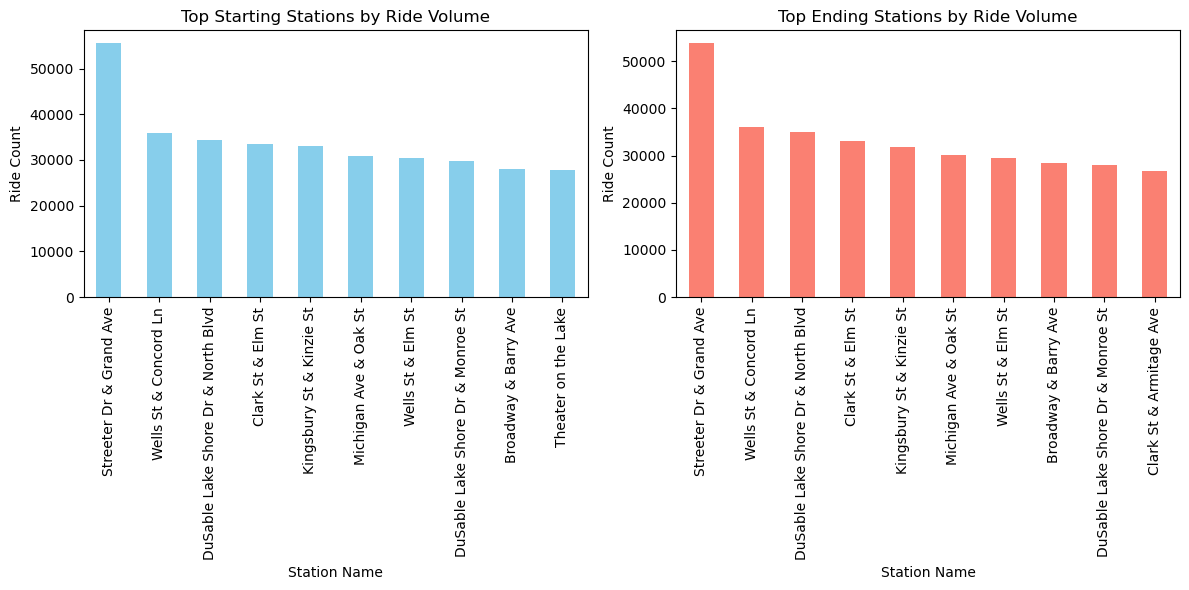

In [41]:
# Calculate the top starting stations by ride volume
top_starting_stations = df['start_station_name'].value_counts().head(10)

# Calculate the top ending stations by ride volume
top_ending_stations = df['end_station_name'].value_counts().head(10)

# Create bar charts to display the top starting and ending stations
plt.figure(figsize=(12, 6))

# Top Starting Stations
plt.subplot(1, 2, 1)
top_starting_stations.plot(kind='bar', color='skyblue')
plt.title('Top Starting Stations by Ride Volume')
plt.xlabel('Station Name')
plt.ylabel('Ride Count')
plt.xticks(rotation=90)

# Top Ending Stations
plt.subplot(1, 2, 2)
top_ending_stations.plot(kind='bar', color='salmon')
plt.title('Top Ending Stations by Ride Volume')
plt.xlabel('Station Name')
plt.ylabel('Ride Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# insight
* over 50000 rides starts and ends at streeter Dr & Grand Ave
* users prefer to start and end their rides at the top three station names as confirmed by the chart

# conclusion from ride volume analysis:
from the insight we got from the ride volume analysis charts, we can conclude with the following:
* There are more Member riders than Casual riders 
* Dock bikes have extremely low patronage by both users 
* The month of june have the Highest ride patronage 
* from the data insight, we would conclude that, campain should be held, in the month of June, on thurdays by 5:00pm
* and if the campain is aimed to last for 2 to 3 days then, Wednesdays and Tuedays  by 5:00pm should also be considered

# Conclusion from Ride length analysis:
* casual riders ride for longer duration than member riders 
* Most riders ride for less than 10 minutes

since the campain is aimed at converting more casual riders to member riders, the following can be done:

* Give discount to members riders who ride for long
* introduce more benefits that will attract casual rider to becoming members 

# conclusion on stations 
from the stations analysis and vissuals, we can conclude that campaign program should be held in at the top 3 stations listed below in decending order of usage by users:
* streeter Dr & Grand Ave
* Wells st & Concord Ln
* Dusable Lake Shore Dr & North Blvd. 

This 3 stations are the best strategic point for the campaign because they are the most utilized by user for both starting and ending ride. 

  
